## Channel with State Demo

Author: Cheuk Ting Li  

In [1]:
from psitip import *
PsiOpts.setting(solver = "pyomo.glpk")     # Set linear programming solver
PsiOpts.setting(repr_latex = True)         # Jupyter Notebook LaTeX display
PsiOpts.setting(venn_latex = True)         # LaTeX in diagrams
PsiOpts.setting(proof_note_color = "blue") # Reasons in proofs are blue

### Noncausal Channel State Information

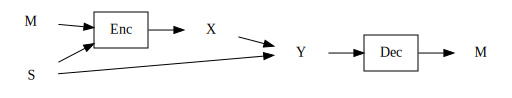

In [2]:
M, X, S, Y = rv("M, X, S, Y")
R = real("R")

# Define channel with state available noncausally at encoder
model = CodingModel()
model.set_rate(M, R)                  # The rate of M is R
model.add_node(M+S, X, label = "Enc") # Encoder maps M, S to X
model.add_edge(S+X, Y)                # Channel S,X -> Y
model.add_node(Y, M, label = "Dec")   # Decoder maps Y to M

model.graph()                         # Draw diagram

In [3]:
C = model.maximum(R, R) # Get capacity, recovers [Gel'fand-Pinsker 1980]
C.lower_bound()

(( ( I(A_M&S) <= I(A_M&Y) )
 &( markov(A_M, S+X, Y) ) ).exists(A_M)).maximum((I(A_M&Y)-I(A_M&S)))

In [4]:
# Converse proof, output auxiliary
(C.lower_bound() >= C.upper_bound()).check_getaux_array()

CompArray(
[[A_M, S_F+Y_P+M]])

In [5]:
# Output converse proof (is_proof = True for shorter proof)
(model.get_outer(is_proof = True) >> model.get_inner()).proof()

In [6]:
bool(C <= I(X & Y | S))  # An upper bound on C

True

In [7]:
# The program makes an implicit assumption that the empirical joint
# distribution of (S,X,Y) is fixed, so we are not free to choose
# X independent of S. Hence, the following test on lower bound fails:
# bool(C >= I(X & Y))
# To show the lower bound, we need an additional assumption:
bool(indep(X, S) >> (C >= I(X & Y)))

True

### Causal Channel State Information

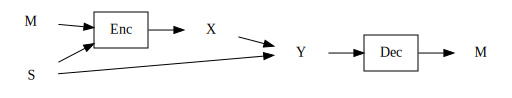

In [8]:
# Define channel with state available causally at encoder
model = CodingModel()
model.set_rate(M, R)                  # The rate of M is R
model.add_node(M+S, X, rv_in_causal = S,
                       label = "Enc") # Encoder maps M, S to X
model.add_edge(S+X, Y)                # Channel S,X -> Y
model.add_node(Y, M, label = "Dec")   # Decoder maps Y to M

model.graph()                         # Draw diagram

In [9]:
C = model.maximum(R, R) # Get capacity, recovers [Shannon 1958]
C.lower_bound()

(( ( indep(A_M, S) )
 &( markov(A_M, S+X, Y) ) ).exists(A_M)).maximum(I(A_M&Y))

In [10]:
# Converse proof, output auxiliary
(C.lower_bound() >= C.upper_bound()).check_getaux_array()

CompArray(
[[A_M, S_P+M]])

In [11]:
# Output converse proof (is_proof = True for shorter proof)
(model.get_outer(is_proof = True) >> model.get_inner()).proof()

In [12]:
bool(C <= I(X & Y | S))  # An upper bound on C

True

In [13]:
bool(indep(X, S) >> (C >= I(X & Y))) # A lower bound on C

True

### References
- A. El Gamal and Y.-H. Kim, _Network Information Theory_, Cambridge University Press, 2011, Ch. 7.
-  S. I. Gel'fand and M. S. Pinsker, "Coding for channel with random parameters," Probl. Contr. and Inf. Theory, vol. 9, no. 1, pp. 19–31, 1980.
-  C. E. Shannon, "Channels with side information at the transmitter," IBM journal of Research and Development, vol. 2, no. 4, pp. 289–293, 1958.